In [1]:
!pip install keras-tuner

     |████████████████████████████████| 133 kB 6.7 MB/s 


In [2]:
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, AveragePooling1D , Flatten, Input, LSTM
from sklearn.model_selection import train_test_split
import pprint as pp
import keras_tuner as kt
from tensorflow.keras.utils import plot_model
from sklearn.utils import shuffle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


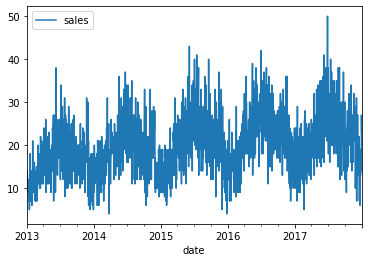

In [4]:
df = pd.read_excel("/content/drive/MyDrive/dataset.xlsx")
df.plot(x = 'date', y = 'sales')
plt.show()

In [5]:
raw_seq = df['sales']

In [6]:
train_seq = raw_seq[:1095]
val_seq = raw_seq[1095:1461].reset_index(drop=True)
test_seq = raw_seq[1461:].reset_index(drop=True)

In [7]:
print(train_seq.size, val_seq.size, test_seq.size)

1095 366 365


In [8]:
# univariate data preparation
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [9]:
n_steps = 30
n_features = 1
X_train, y_train = split_sequence(train_seq, n_steps)
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=10)
X_test, y_test = split_sequence(test_seq, n_steps)
X_val, y_val = split_sequence(val_seq, n_steps)


In [22]:
y_val_pred = X_val[:, -1]

In [24]:
mean_absolute_error(y_val, y_val_pred)

5.625

In [25]:
mean_squared_error(y_val, y_val_pred)

51.32738095238095

In [26]:
mean_squared_error(y_val, y_val_pred) ** 0.5

7.164313013288919

In [27]:
mean_absolute_percentage_error(y_val, y_val_pred) * 100

27.922610201685615

In [13]:
y_pred = X_test[:, -1]

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [17]:
mean_absolute_error(y_test, y_pred)

6.250746268656717

In [18]:
mean_squared_error(y_test, y_pred)

59.61194029850746

In [23]:
mean_squared_error(y_test, y_pred) ** 0.5

7.720876912534448

In [20]:
mean_absolute_percentage_error(y_test, y_pred) * 100

31.584229964101677